<a href="https://colab.research.google.com/github/shoumyasingh/Artificial_Intelligence_python/blob/main/Al_hw3_q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("fans.csv") #dataset
df.head(11)

,ID,Name,Age,Gender,Fan
0,0,Bill,32,0,Rolling Stones
1,1,Henry,40,0,Neither
2,2,Mary,16,1,Taylor Swift
3,3,Tiffany,14,1,Taylor Swift
4,4,Michael,55,0,Neither
5,5,Carlos,40,0,Taylor Swift
6,6,Ashely,20,1,Neither
7,7,Robert,15,0,Taylor Swift
8,8,Sally,55,1,Rolling Stones
9,9,John,15,0,Rolling Stones


In [24]:
X = df.iloc[:, 2:4].values #considering Age and Gender as X where 0 = male and 1 = female
X

array([[32,  0],
       [40,  0],
       [16,  1],
       [14,  1],
       [55,  0],
       [40,  0],
       [20,  1],
       [15,  0],
       [55,  1],
       [15,  0],
       [10,  1]])

In [25]:
y = df.iloc[:,4].values #considering Fan as y
y

array(['Rolling Stones', 'Neither', 'Taylor Swift', 'Taylor Swift',
       'Neither', 'Taylor Swift', 'Neither', 'Taylor Swift',
       'Rolling Stones', 'Rolling Stones', '?'], dtype=object)

In [26]:
#transforming y values from non numerical labels to numerical labels
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [27]:
y # 0 = ?,1 = Neither,2 = Rolling stones,3 = Taylor Swift

array([2, 1, 3, 3, 1, 3, 1, 3, 2, 2, 0])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)   # training set: 70%


In [29]:
"""
    Feature Scaling
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
"""
    Training and Predictions
"""
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


[[0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.12      0.25      0.17         4
weighted avg       0.12      0.25      0.17         4



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Mean Error')

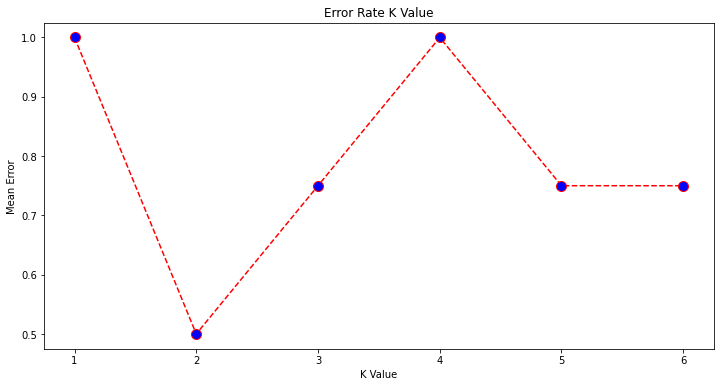

In [31]:
"""
    Evaluating the Algorithm
"""
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred)) #https://www.youtube.com/watch?v=Kdsp6soqA7o
print(classification_report(y_test, y_pred))

"""
    Comparing Error Rate with the K Value
"""
error = []

# Calculating error for K values between 1 and 7
for i in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=i)   # K = 1 to 7
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 7), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [34]:
new_value = ([[10,1]])

In [36]:
# 1 = Neither,2 = Rolling stones,3 = Taylor Swift
classifier.predict(new_value)


array([1])

The predicated 1 = Neither